## Daibetes Prediction

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy.

Your body breaks down most of the food you eat into sugar (glucose) and releases it into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin. Insulin acts like a key to let the blood sugar into your body’s cells for use as energy.

With diabetes, your body doesn’t make enough insulin or can’t use it as well as it should. When there isn’t enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss, and kidney disease.

There isn’t a cure yet for diabetes, but losing weight, eating healthy food, and being active can really help. Other things you can do to help:

Take medicine as prescribed.
Get diabetes self-management education and support.
Make and keep health care appointments.

Thre are a number of factors that play a key role in diabetes prediction, such as Hypertension, Heart Disease, Smoking history, BMI etc.




## Objectives

Perform analysis on the given dataset to find out the relation between Diabetes and factors such as:<br>
    Age <br>
    Gender<br>
    Hypertension<br>
    Body Mass Index<br>
    HbA1c level etc.<br>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")


### Dataset

For this prediction we wil use a Diabetes Prediction Dataset.

<br>The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

HbA1c or Haemoglobin A1c level- average blood sugar level over past three months

<br>This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

### Importing dataset

In [185]:
df= pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Knowing about the dataset is very important. The presence of missing values (if any), the data types of the of the variables very much helps in knowing about the data. Here we will be cleaning the data to make it ready for further processing.

In [186]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [187]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [188]:
df.shape

(100000, 9)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [190]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## Data Visualization

We will be visualizing the dataset for relations with the target value. We are using Seaborn library for plotting these relations

Firstly we will be plotting the relationship between Hb1Ac levels and the target variable ie Diabetes to see how the Hb1Ac levels are related to diabetes prediction.

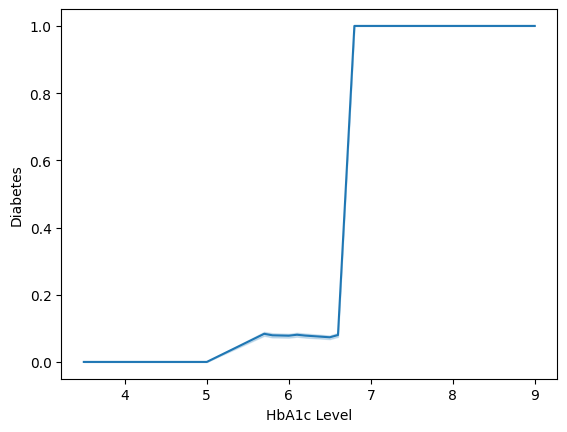

In [191]:
sns.lineplot(x='HbA1c_level', y='diabetes', data=df)
plt.xlabel('HbA1c Level')
plt.ylabel('Diabetes')
plt.show()

As can be seen from the plot above, the people with Hb1Ac levels lower than 6.6 are less prone to be diagnosed with diabetes. The people with Hb1Ac levels above 6.6 are more likely to be diagnosed with diabetes.

The following bar chart describes the relationship between Gender of a person with how likely is he or she to be diagnosed with Diabetes

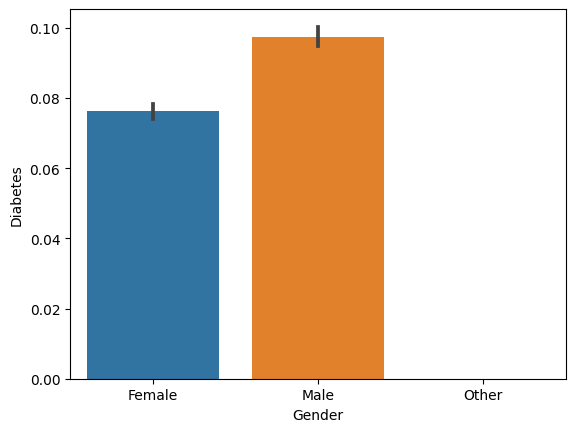

In [192]:
sns.barplot(x='gender', y='diabetes', data= df)
plt.xlabel('Gender')
plt.ylabel('Diabetes')
plt.show()

As can be from the barchart above, Men are more likely to be diagnosed with diabetes than females.

The following barchart shows the relationship between Smoking history of a person with Diabetes.

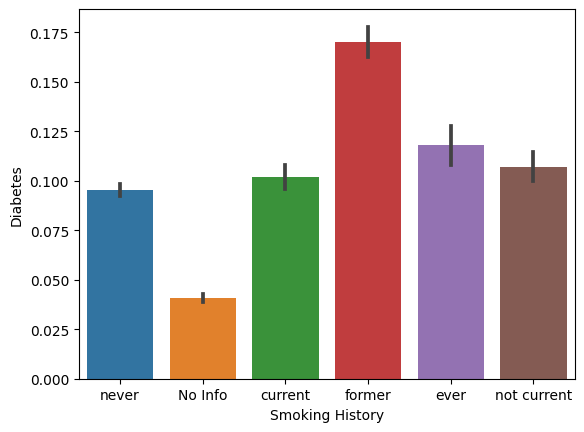

In [193]:
sns.barplot(x='smoking_history', y='diabetes', data=df)
plt.xlabel('Smoking History')
plt.ylabel('Diabetes')
plt.show()

As can be seen from the plot above, the pople who used to smoke earlier had more chances of getting diagnosed with diabetes. Interestingly, from the plot above it can also be interpreted that people who never smoked and who are active smokers had the same chance of getting diabetes.

The data contains two features, Gender and Smoking History as object types. For machine learning models to work on these features, they have to encoded in numerical form.
The Label Encoder encodes the features into numerical format. We will be using Label Encoder for transforming the data type of the required features to numerical format

In [194]:
le= LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [195]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


The following line chart shows the relationship between Blood Glucose Level and Diabetes for the examples in the dataset.

Text(0, 0.5, 'Diabetes')

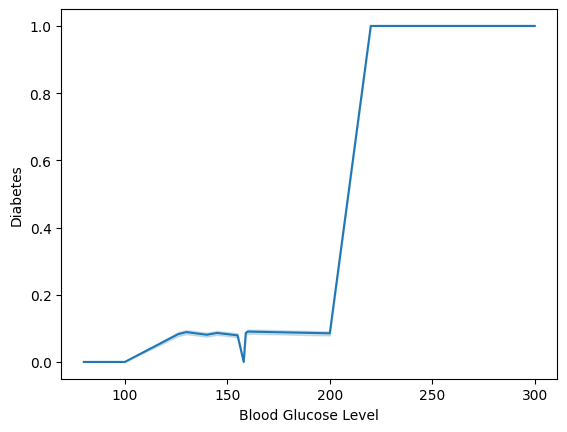

In [196]:
sns.lineplot(x='blood_glucose_level', y='diabetes', data=df)
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')

From the plot above it can be observed that people with blood glucose levels of 200 or more had been diagnosed with diabetes.

## Creating the model

Now that our dataset is ready to work on we will be using Machine Learning Models to make predictions from the data.
The prediction will be a binary classification that will determine whether a person will be diagnosed with diabetes with or not.

For this we will be using Classifier Models namely:-
1. K Nearest Neighbors
2. Decision Trees
3. Random Forest Classifier

For Hypermater Tuning we will be using Randomized Search CV

In [197]:
df.shape

(100000, 9)

In [198]:
X= df.drop(['diabetes'], axis=1)
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [199]:
Y= df['diabetes']

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [201]:
print("Training Set shape is {}" .format(X_train.shape))
print("Test Set shape is {}" .format(X_test.shape))

Training Set shape is (80000, 8)
Test Set shape is (20000, 8)


In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [203]:
params= {'n_neighbors':[2,3,5,6,7,8,9,10],
         'weights': ['uniform', 'distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'p':[1,2]}

knn= KNeighborsClassifier()
knn_random= RandomizedSearchCV(estimator=knn, param_distributions=params, cv= 3, n_jobs= -1, verbose=2)
knn_model= knn_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [204]:
knn_params= knn_model.best_params_
print("The best parameters are:", knn_params)
knn_score= knn_model.best_score_
print("The best score is", knn_score)

The best parameters are: {'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'algorithm': 'auto'}
The best score is 0.951912471547117


In [205]:
from sklearn.metrics import accuracy_score

In [206]:
yhat= knn_model.predict(X_test)
knn_score= accuracy_score(Y_test, yhat)
print("Accuracy score for the given KNN model is", knn_score)

Accuracy score for the given KNN model is 0.9529


In [207]:
#Decision Trees
params= {'criterion':['gini', 'entropy', 'log_loss'],
         'max_features':['auto', 'sqrt', 'log2'],
         'splitter': ['best', 'random'],
         'max_depth': [5, 10, 12, 15, 18,20],
         'min_samples_split': [2,5,7,10,15,20,25,30],
         'min_samples_leaf': [1,2,5,7,10]}

tree= DecisionTreeClassifier()
tree_random= RandomizedSearchCV(estimator=tree, param_distributions=params, cv=5, n_jobs= -1, verbose=2, random_state=42)
tree_model= tree_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [208]:
tree_params= tree_model.best_params_
tree_score= tree_model.best_score_
print("The best parameters are:", tree_params)
print("The score for best parameters is:", tree_score)

The best parameters are: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}
The score for best parameters is: 0.9710000000000001


In [209]:
yhat= tree_model.predict(X_test)

In [210]:
tree_score= accuracy_score(Y_test, yhat)
print("The accuracy score for Decision Tree model is:",tree_score)

The accuracy score for Decision Tree model is: 0.9721


In [211]:
random_search= {'n_estimators': [100, 150, 170, 220, 250],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [5,10,15,17,20],
                'min_samples_split': [2,5,7,10,15,20,30,50,70,100],
                'min_samples_leaf':[1,2,5,10]}

rf= RandomForestClassifier()
rf_random= RandomizedSearchCV(estimator=rf, param_distributions=random_search, cv=5, n_jobs=-1, verbose=True, random_state=42)

In [212]:
rf_model= rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [213]:
rf_params=rf_model.best_params_
print("The best parameters are:", rf_params)
rf_bscore=rf_model.best_score_
print("The best score is:", rf_bscore)

The best parameters are: {'n_estimators': 150, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15}
The best score is: 0.97205


In [214]:
yhat= rf_model.predict(X_test)

In [215]:
rf_score= accuracy_score(Y_test, yhat)
print("The accuracy score for Random Forest Classifier is:", rf_score)

The accuracy score for Random Forest Classifier is: 0.9724


### The Best Model


After running the dataset through the Machine Learning Models, we need to find out which model runs the best.<br>
We will be classifying the dataset along with their accuracy scores.

The below code output shows the models and their accuracy scores.

In [216]:
score_df= pd.DataFrame({"Model":['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'],
                        'Accuracy':[knn_score*100, tree_score*100, rf_score*100]})
score_df

,Model,Accuracy
0,KNeighborsClassifier,95.29
1,DecisionTreeClassifier,97.21
2,RandomForestClassifier,97.24


In [217]:
algorithms= {"KNeighborsClassifier": knn_score, "DecisionTreeClassifier": tree_score, "RandomForestClassifier": rf_score}
best_model= max(algorithms, key=algorithms.get)
print("Best algorithm is",best_model, "and the score is", algorithms[best_model]*100)
if best_model == "KNeighborsClassifier":
    print("The best parameters are:", knn_params)
elif best_model == "DecisionTreeClassifier":
    print("The best parameters are:", tree_params)
else:
    print("The best parameters are:", rf_params)

Best algorithm is RandomForestClassifier and the score is 97.24000000000001
The best parameters are: {'n_estimators': 150, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15}


Finally, after running our dataset throught these models we find that Decision Tree Classifier is the best model and gives a accuracy score of 97 %.